In [1]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *
import timm

In [2]:
!nvidia-smi

Tue Mar  9 09:54:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:19:00.0 Off |                  N/A |
| 28%   36C    P8    23W / 250W |     10MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 42%   78C    P2   102W / 250W |  10855MiB / 10989MiB |     55%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [8]:
import torch
torch.cuda.set_device(3)

In [9]:
path = Path('datasetPrueba/')
trainPath = path/'train'
testPath = path/'test'

In [10]:
def getDataBlock(presize=512,size=256):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = [Resize(presize)],
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=180,pad_mode=PadMode.Zeros), Normalize.from_stats(*imagenet_stats)])

In [11]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [12]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='resnet50'),
    MixUp(),
]

In [13]:
learn = timm_learner(dls512, 'resnet50d',cbs = callbacks,metrics=[accuracy,Precision(),Recall()]).to_fp16()

In [14]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.095686,0.699729,0.677127,0.775542,0.562290,00:38


Better model found at epoch 0 with valid_loss value: 0.6997289657592773.


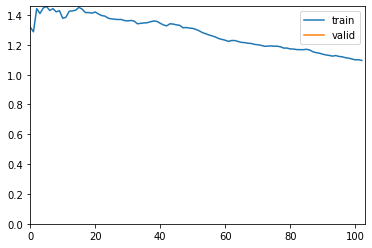

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.966380,0.657739,0.696439,0.795732,0.585859,00:42
1,0.946003,0.619581,0.704888,0.779944,0.628507,00:34
2,0.942586,0.633382,0.709716,0.800587,0.612795,00:34
3,0.913743,0.610860,0.710320,0.802651,0.611672,00:34
4,0.898414,0.625144,0.713941,0.811659,0.609428,00:34
5,0.902779,0.585040,0.726011,0.803051,0.649832,00:34
6,0.887181,0.578766,0.720579,0.801408,0.638608,00:34
7,0.894646,0.567711,0.719976,0.795297,0.645342,00:34
8,0.877533,0.539156,0.726011,0.790173,0.667789,00:34
9,0.862920,0.557625,0.729028,0.806944,0.652076,00:34


Better model found at epoch 0 with valid_loss value: 0.6577385067939758.


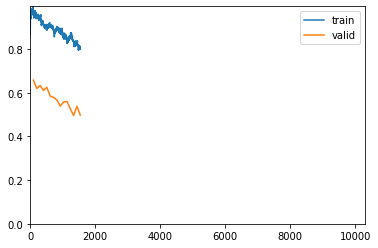

Better model found at epoch 1 with valid_loss value: 0.6195808053016663.
Better model found at epoch 3 with valid_loss value: 0.6108603477478027.
Better model found at epoch 5 with valid_loss value: 0.5850404500961304.
Better model found at epoch 6 with valid_loss value: 0.5787661075592041.
Better model found at epoch 7 with valid_loss value: 0.567710816860199.
Better model found at epoch 8 with valid_loss value: 0.5391561388969421.
Better model found at epoch 11 with valid_loss value: 0.5270404815673828.
Better model found at epoch 12 with valid_loss value: 0.496002733707428.
No improvement since epoch 12: early stopping


In [15]:
learn.fine_tune(100,base_lr=1e-4)

In [16]:
path = Path('dataset/')
trainPath = path/'train'
testPath = path/'test'

In [17]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [18]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [19]:
learn.freeze()

In [20]:
learn.dls=dls512

In [21]:
#learn.load('hrnet')

In [22]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.217861,0.852927,0.550459,0.536585,0.553459,00:13


Better model found at epoch 0 with valid_loss value: 0.8529265522956848.


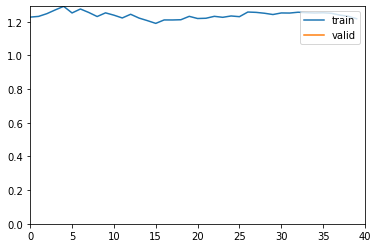

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.165616,0.846943,0.559633,0.545181,0.569182,00:14
1,1.176389,0.845543,0.571865,0.558282,0.572327,00:15
2,1.193061,0.841304,0.558104,0.542029,0.588050,00:14
3,1.196849,0.838187,0.577982,0.566879,0.559748,00:15
4,1.187704,0.828027,0.564220,0.549254,0.578616,00:14
5,1.172567,0.818162,0.579511,0.565749,0.581761,00:15
6,1.188056,0.829835,0.571865,0.564189,0.525157,00:15
7,1.168236,0.817567,0.571865,0.559375,0.562893,00:14
8,1.179995,0.801634,0.581040,0.565476,0.597484,00:15
9,1.155379,0.796320,0.581040,0.561453,0.632075,00:14


Better model found at epoch 0 with valid_loss value: 0.8469429612159729.


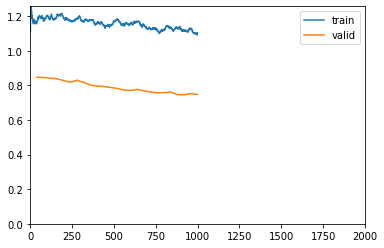

Better model found at epoch 1 with valid_loss value: 0.8455430865287781.
Better model found at epoch 2 with valid_loss value: 0.8413044214248657.
Better model found at epoch 3 with valid_loss value: 0.8381873965263367.
Better model found at epoch 4 with valid_loss value: 0.8280271887779236.
Better model found at epoch 5 with valid_loss value: 0.8181615471839905.
Better model found at epoch 7 with valid_loss value: 0.8175672292709351.
Better model found at epoch 8 with valid_loss value: 0.8016337752342224.
Better model found at epoch 9 with valid_loss value: 0.7963200807571411.
Better model found at epoch 10 with valid_loss value: 0.7936280965805054.
Better model found at epoch 11 with valid_loss value: 0.7884758710861206.
Better model found at epoch 12 with valid_loss value: 0.782630443572998.
Better model found at epoch 13 with valid_loss value: 0.7731224298477173.
Better model found at epoch 14 with valid_loss value: 0.7704071402549744.
Better model found at epoch 16 with valid_loss 

In [23]:
learn.fine_tune(50,base_lr=1e-5)

In [24]:
learn.dls = dlsTest

In [25]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.5782396197319031.


(#4) [0.7577125430107117,0.5782396197319031,0.6066350710900474,0.5885057471264368]